In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values, t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values
data=np.delete(data, 100, axis=0)

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=log_dat_x

In [18]:
max_x=np.max(x_train, axis=0)

In [19]:
x_train=x_train/ max_x

In [20]:
max_y=np.max(log_dat_y)

In [21]:
y_train=log_dat_y/max_y

In [22]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [23]:
model=nn.Linear(6,1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1938, -0.4077, -0.2841,  0.2276, -0.0659, -0.0605]],
       requires_grad=True), Parameter containing:
tensor([-0.3350], requires_grad=True)]


In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [26]:
import time
nb_epochs = 1000
start = time.time()
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
print("time:{:.6f} s".format(time.time()-start))

Epoch    0/1000 Cost: 0.868214
Epoch  100/1000 Cost: 0.153209
Epoch  200/1000 Cost: 0.079339
Epoch  300/1000 Cost: 0.046608
Epoch  400/1000 Cost: 0.029545
Epoch  500/1000 Cost: 0.020397
Epoch  600/1000 Cost: 0.015464
Epoch  700/1000 Cost: 0.012800
Epoch  800/1000 Cost: 0.011361
Epoch  900/1000 Cost: 0.010583
Epoch 1000/1000 Cost: 0.010163
time:0.289000 s


In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.9355, -0.2302, -0.1391, -0.0444, -0.4001, -3.0960]],
       requires_grad=True), Parameter containing:
tensor([2.6266], requires_grad=True)]


In [28]:
x=np.squeeze(model(x_train).detach().numpy())

In [29]:
y=y_train.detach().numpy()

In [30]:
x.shape

(467,)

In [31]:
y.shape

(467,)

MSE: 0.01016303151845932
RMSE: 0.10081186199281968
Percentage error: 10.606852865825832 %


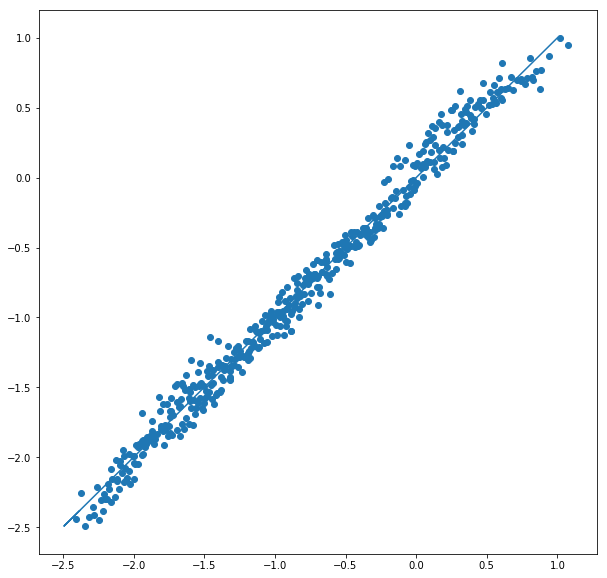

In [32]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show
print('MSE:',cost.item())
print('RMSE:', np.sqrt(cost.item()))
print('Percentage error:', (np.exp(np.sqrt(cost.item()))-1)*100,'%')